# Introduction

This project aims to investigate the relationship between the economic output of a country and the life expectancy of its citizens. The analysis will focus on identifying significant correlations between GDP and life expectancy across six selected nations.

The objectives of this project include data preparation, exploratory data analysis, and visualization of the findings. Specifically, we will seek to answer the following questions:

+ Has life expectancy shown a positive trend over time in the six selected nations?
+ Has GDP experienced growth over time in these countries?
+ Is there a discernible correlation between GDP and life expectancy in each nation?
+ What is the average life expectancy across these countries?
+ How is life expectancy distributed among the nations studied?

By addressing these questions, we aim to provide insights into the factors that may influence life expectancy and the role of economic performance in public health outcomes.

**Data Sources**

- GDP Data Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data and OECD National Accounts data files.
- Life Expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


# Import Python Modules
First, import the preliminary modules that will be used in this project:

In [94]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Import the data
Here we will import "all_data.csv", store it as a dataframe and have an initial inspection

In [97]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [99]:
df.shape

(96, 4)

# Data Exploration
Let's have a look at the unique countries present on the dataset

In [102]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Now, let's look at the years tracked on the dataset

In [105]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Columns names standarisation
Looking at the 4 columns, we can see that the column "Life expectancy at birth (years)" is  a bit too long and the only column with several words (the rest are single worded columns). We will rename it to LEAB_Y

In [108]:
df = df.rename({"Life expectancy at birth (years)":"LEAB_Y"}, axis = "columns")
df.head()

,Country,Year,LEAB_Y,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Exploratory plots

### GDP distribution

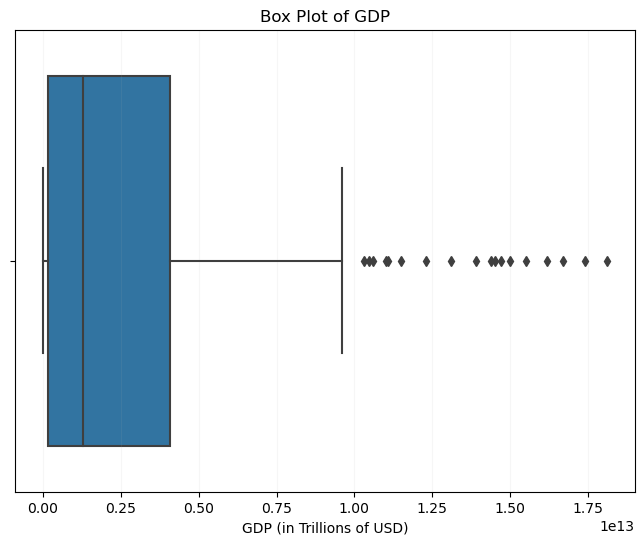

In [112]:
plt.figure(figsize=(8,6))
sns.boxplot(x='GDP', data = df)
plt.title('Box Plot of GDP')
plt.xlabel('GDP (in Trillions of USD)')
plt.grid(axis='x', alpha=0.1)
plt.show()


/Users/Z004EYJD/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


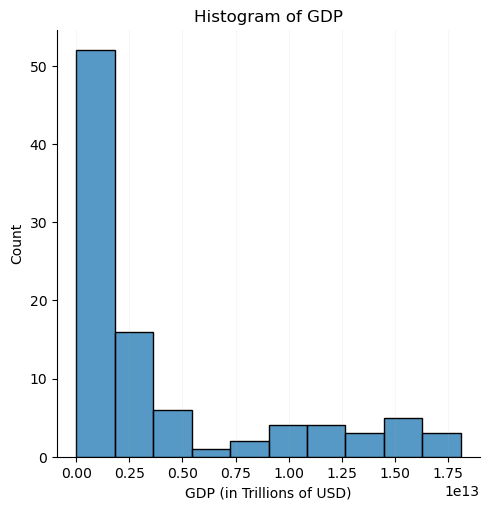

In [114]:
sns.displot(df.GDP, bins=10, kde = False)
plt.title('Histogram of GDP')
plt.xlabel('GDP (in Trillions of USD)')
plt.grid(axis='x', alpha=0.1)
plt.show()

The preceding graph illustrates a distinct right skew in the distribution of GDP among countries, indicating that a significant majority of the values cluster near zero. This pattern suggests that a substantial portion of global wealth is concentrated within a limited number of countries, highlighting the disparity in economic resources worldwide.

## Pairplot: GDP (USD) and Life Expectancy (Yrs)
Let's combina a visualization of GDP and Life Expectancy together

/Users/Z004EYJD/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


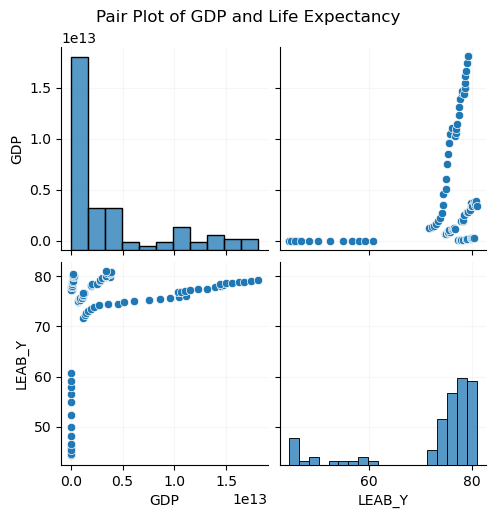

In [118]:
g = sns.pairplot(df[['GDP', 'LEAB_Y']])
g.fig.suptitle('Pair Plot of GDP and Life Expectancy', y=1.02)
for ax in g.axes.flatten():
    ax.grid(True, alpha=0.1)
plt.show()

From now on, we will start doing a deep dive into the Life Expectancy and GDP per country.
Let's start with a quick check of the average Life Expectancy and GDP values per country over the years

In [121]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

In [123]:
print(dfMeans)

                    Country    LEAB_Y           GDP
0                     Chile  78.94375  1.697888e+11
1                     China  74.26250  4.957714e+12
2                   Germany  79.65625  3.094776e+12
3                    Mexico  75.71875  9.766506e+11
4  United States of America  78.06250  1.407500e+13
5                  Zimbabwe  50.09375  9.062580e+09


In order to be consistant over the following plots, we will define the following color palette for the different countries

In [159]:
country_colors = {
    'Chile': 'orange',
    'China': 'red',
    'Germany': 'blue',
    'Mexico': 'green',
    'United States of America': 'purple',
    'Zimbabwe': 'yellow'
}

#### Deep dive into GDP values

##### GDP boxplot
We will explore the mean and variancy of GDP over the years

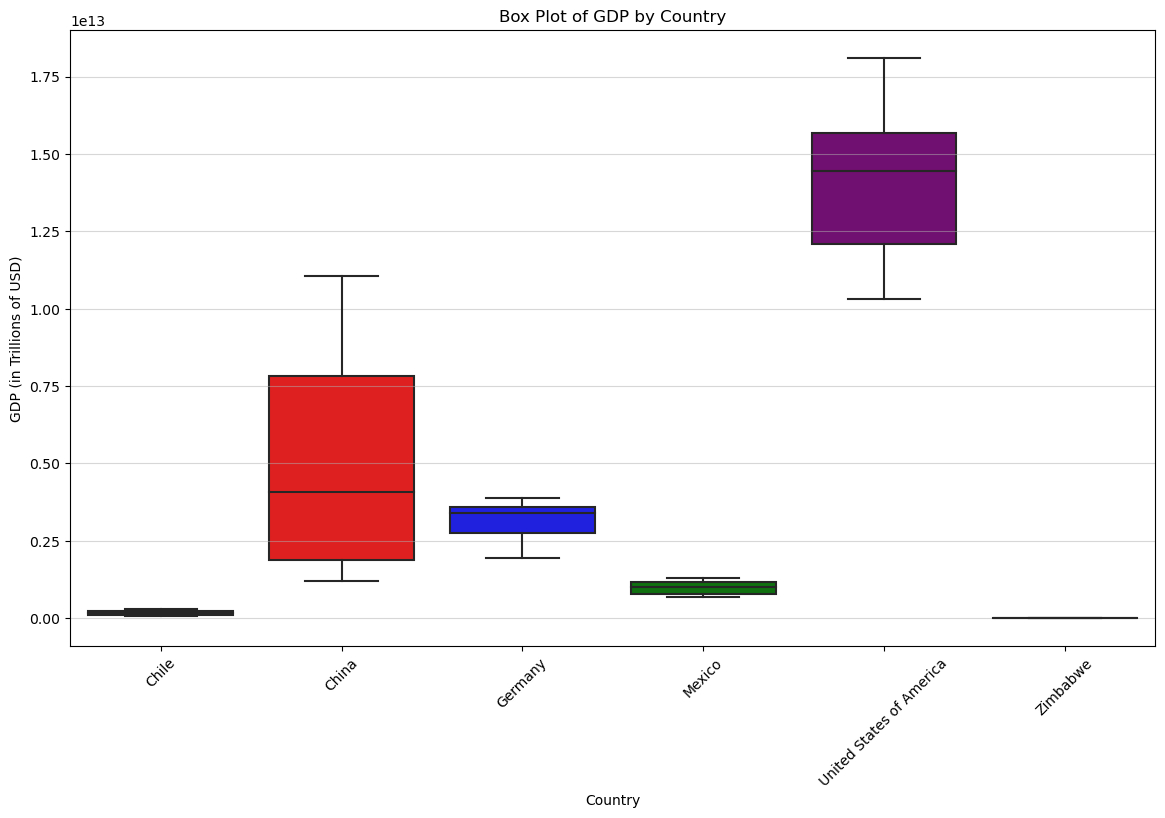

In [162]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Country', y='GDP', palette=country_colors)
plt.title('Box Plot of GDP by Country')
plt.xlabel('Country')
plt.ylabel('GDP (in Trillions of USD)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.grid(axis='y', alpha=0.5)
plt.show()

Given the previous results, it could be interesting to deep dive into the evolution of GDP over time.
Due to the boxes sizes, we could expect China and USA to have experienced the biggest changes over the years

##### GDP Line Chart

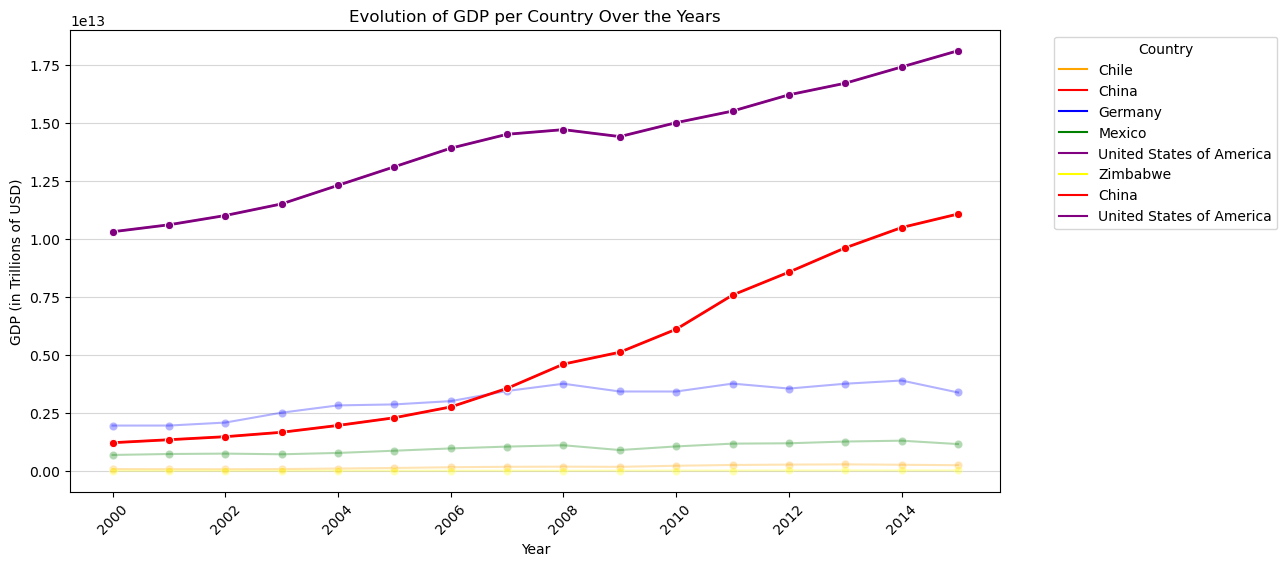

In [170]:
# Create a line chart
highlight_countries = df[df['Country'].isin(['United States of America', 'China'])]
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='GDP', hue='Country', marker='o', alpha=0.3, palette=country_colors)  # Más transparente para los demás países

# Highlight USA and China
sns.lineplot(data=highlight_countries, x='Year', y='GDP', hue='Country', marker='o', lw=2, palette=country_colors)

plt.title('Evolution of GDP per Country Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP (in Trillions of USD)')
plt.xticks(rotation=45)  # Rotate xticks if necessary
plt.grid(axis='y', alpha=0.5)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

In light of the previous graph, it is easy to see that the United States of America and China have the steepest GDP evolution over the years

#### Deep dive into Life Expectancy values

##### Life Expectancy Box Plots

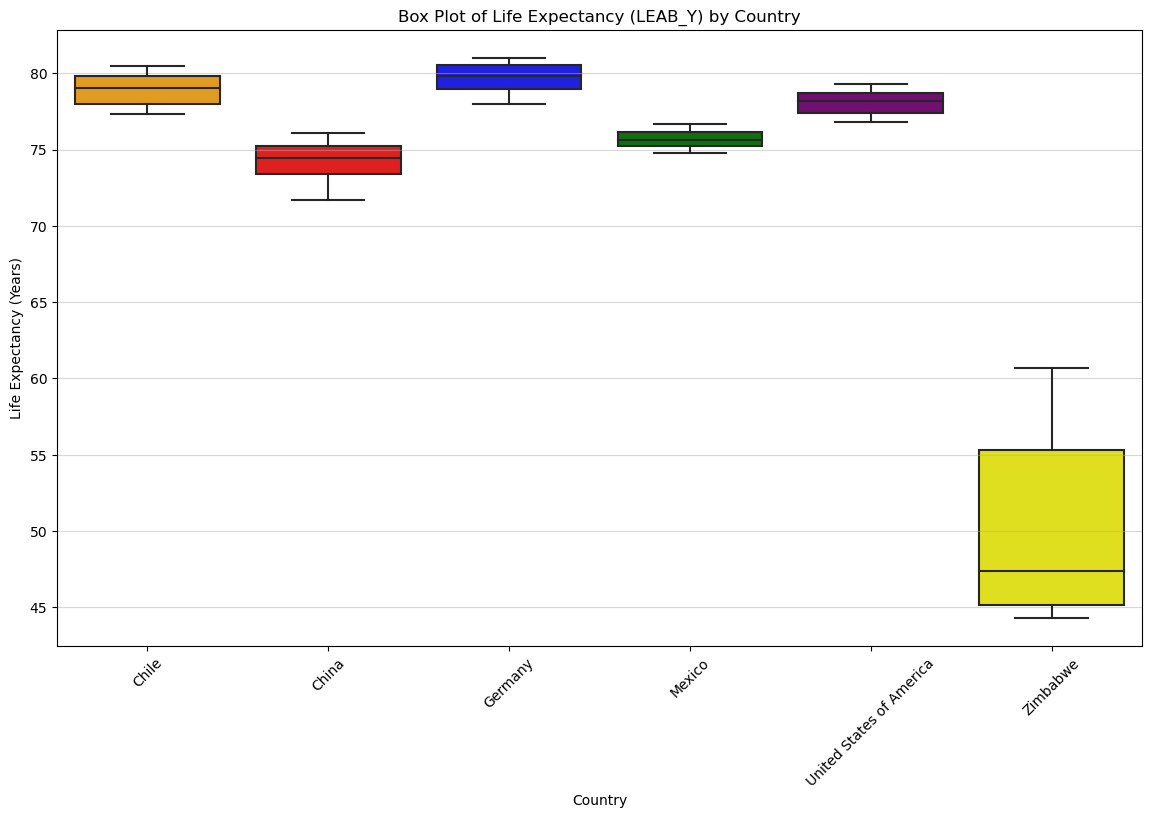

In [177]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Country', y='LEAB_Y', palette=country_colors)
plt.title('Box Plot of Life Expectancy (LEAB_Y) by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (Years)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.grid(axis='y', alpha=0.5)
plt.show()

Given the sizes of the boxes, we can infer that most countries have experienced similar variances over the years, regardless of the trend. However, Zimbabwe stands out with its larger box size, suggesting a more pronounced evolution over time

##### Life Expectancy Line Charts

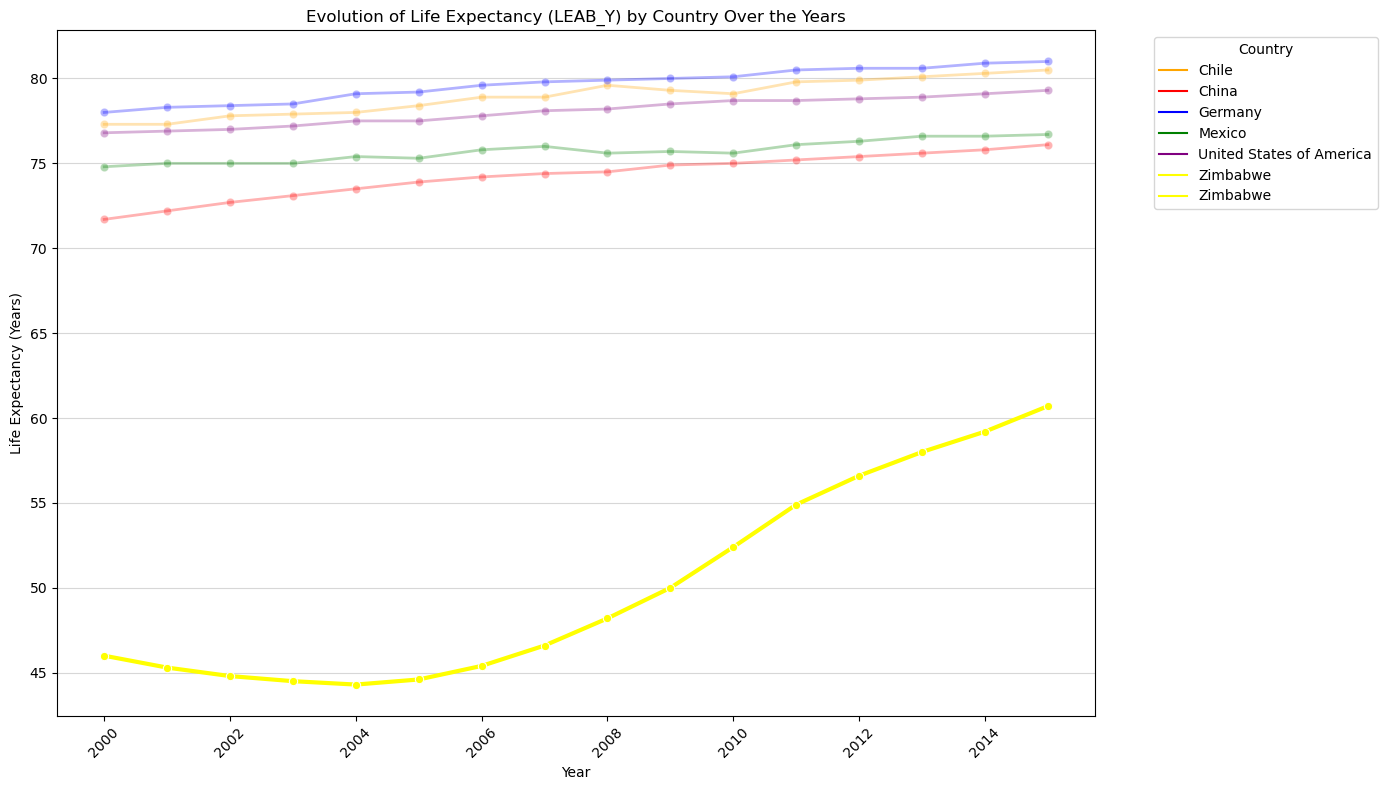

In [187]:
# Create a DataFrame for Zimbabwe
zimbabwe_data = df[df['Country'] == 'Zimbabwe']

# Create a line chart for all countries
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Year', y='LEAB_Y', hue='Country', marker='o', lw=2, alpha=0.3, palette=country_colors)  # More transparent for other countries

# Highlight Zimbabwe with a different color and line width
sns.lineplot(data=zimbabwe_data, x='Year', y='LEAB_Y', hue='Country', marker='o', lw=3, palette=country_colors)

plt.title('Evolution of Life Expectancy (LEAB_Y) by Country Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.grid(axis='y', alpha=0.5)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

We can observe a consistent upward trend with a similar slope for all countries, except for Zimbabwe, which recorded its lowest point in 2004. In that year, its life expectancy began to rise almost exponentially

# Conclusions

In this project, we analyzed a dataset consisting of 96 rows, containing data on GDP and life expectancy for six countries: Chile, China, Germany, Mexico, the United States of America, and Zimbabwe, over a period of 16 years (from 2000 to 2015). The dataset includes four columns, namely 'Country', 'Year', 'Life Expectancy at Birth (Years)', and 'GDP in USD'.

In an attempt to answer the initial questions set as the objectives of the project:

- Has life expectancy shown a positive trend over time in the six selected nations?
Yes, with the exception of Zimbabwe, whose life expectancy curve exhibited a declining slope until 2004, after which it experienced exponential growth, increasing by 33% from its lowest point.

- Has GDP experienced growth over time in these countries?
This is true for Germany, the United States, and China, with the latter two showing particularly notable growth. However, countries like Chile, Mexico, and Zimbabwe do not exhibit significant growth.

- Is there a discernible correlation between GDP and life expectancy in each nation?
Yes, there is a positive correlation between GDP and life expectancy for the countries in our list.
    
- What is the average life expectancy across these countries?
The distribution of life expectancy among the studied nations shows significant variation:
Germany has the highest life expectancy at 79.66 years.
Chile follows closely with 78.94 years.
United States of America has an average life expectancy of 78.06 years.
Mexico shows a life expectancy of 75.72 years.
China has a life expectancy of 74.26 years.
Zimbabwe has the lowest life expectancy at only 50.09 years

- What is the average GDP across these countries?

The distribution of GDP among the studied nations indicates a substantial disparity:
United States of America has the highest GDP at 14.08 trillion USD.
China follows with a significant GDP of 4.96 trillion USD.
Germany has a GDP of 3.09 trillion USD.
Mexico shows a GDP of 97.67 billion USD.
Chile has a GDP of 169.79 billion USD.
Zimbabwe has the lowest GDP at 9.06 billion USD.
This distribution illustrates a pronounced economic disparity, particularly with the United States and China leading by a substantial margin compared to the other countries
